Fundamentos de ciência de dados - Luiz Davi e Thiago Cavalcanti

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from constantes import RESULTADOS_PATH
import numpy as np
import os

# RF8 – Apresentar gráficos de desempenho do seu time [temporada 23-24 e temporada atual] para compor o Dashboard do projeto:

### Gráfico de Barras Empilhado para Vitórias [Cor verde] e Derrotas [Cor vermelha]

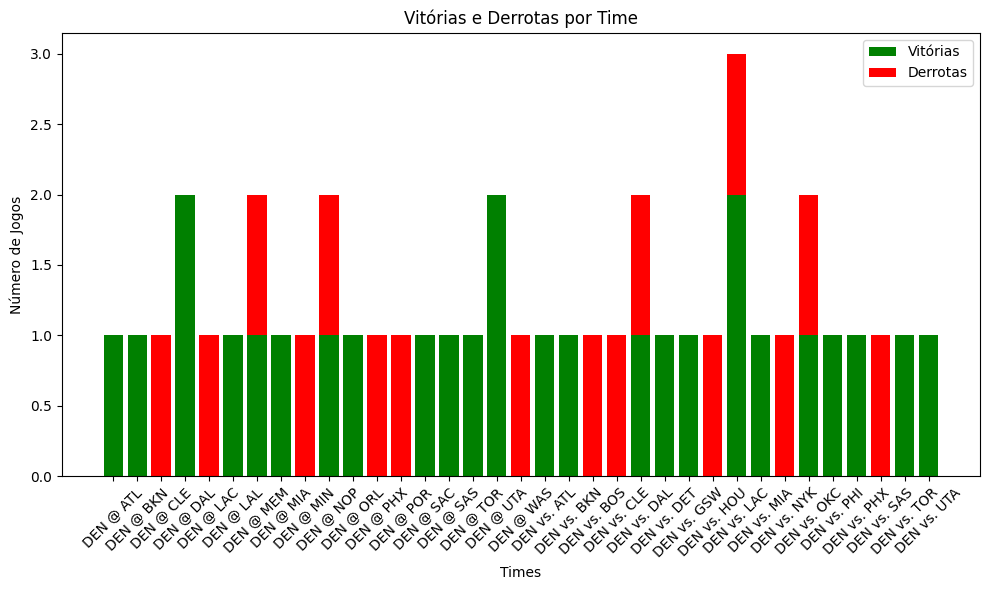

In [2]:
file_path = f"{RESULTADOS_PATH}/rf3_data_set.csv"
data = pd.read_csv(file_path)

teams = data['MATCHUP'].apply(lambda x: x.split(' ')[0]).unique()
wins = data[data['WL'] == 'W'].groupby('MATCHUP')['WL'].count()
losses = data[data['WL'] == 'L'].groupby('MATCHUP')['WL'].count()

team_results = pd.DataFrame({'Wins': wins, 'Losses': losses}).fillna(0).sort_index()

x = team_results.index
wins = team_results['Wins']
losses = team_results['Losses']

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x, wins, color='green', label='Vitórias')
bar2 = ax.bar(x, losses, bottom=wins, color='red', label='Derrotas')

ax.set_title('Vitórias e Derrotas por Time')
ax.set_ylabel('Número de Jogos')
ax.set_xlabel('Times')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

output_path = f"{RESULTADOS_PATH}/graficos"
os.makedirs(output_path, exist_ok=True)
output_file = f"{output_path}/denver_vitorias_derrotas.png"

plt.savefig(output_file, format='png', dpi=300)

plt.show()

### Gráfico de Barras Agrupado para Vitórias em casa [Cor verde], Vitórias fora de casa [Cor azul], Derrotas em casa [Cor vermelha] e Derrotas fora de casa [Cor marrom].

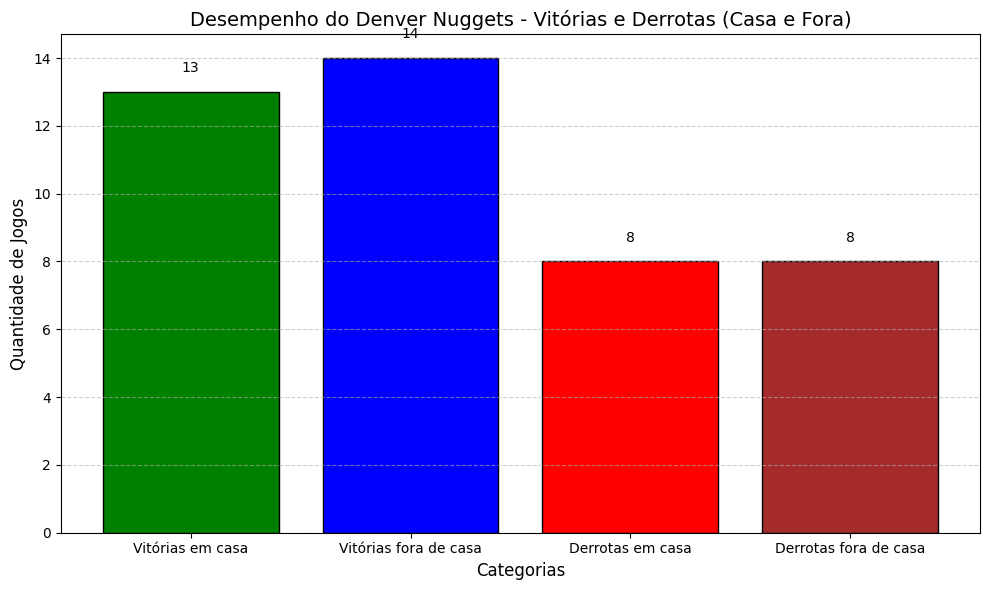

In [4]:
file_path = f"{RESULTADOS_PATH}/rf3_total_vitorias_derrotas_denver.csv"
data = pd.read_csv(file_path)

categories = ['Vitórias em casa', 'Vitórias fora de casa', 'Derrotas em casa', 'Derrotas fora de casa']
values = [
    data['Total de vitórias em casa'].iloc[0],
    data['Total de vitórias fora de casa'].iloc[0],
    data['Total de derrotas em casa'].iloc[0],
    data['Total de derrotas fora de casa'].iloc[0],
]

colors = ['green', 'blue', 'red', 'brown']

_, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(categories, values, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}', ha='center', va='bottom', fontsize=10)

ax.set_title('Desempenho do Denver Nuggets - Vitórias e Derrotas (Casa e Fora)', fontsize=14)
ax.set_ylabel('Quantidade de Jogos', fontsize=12)
ax.set_xlabel('Categorias', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

output_path = f"{RESULTADOS_PATH}/graficos"
os.makedirs(output_path, exist_ok=True)
output_file = f"{output_path}/denver_vitorias_derrotas_barras_agrupadas.png"
plt.savefig(output_file, format='png', dpi=300)

plt.tight_layout()
plt.show()

### Gráfico Histograma para exibir a frequência de vitórias e derrotas do time.

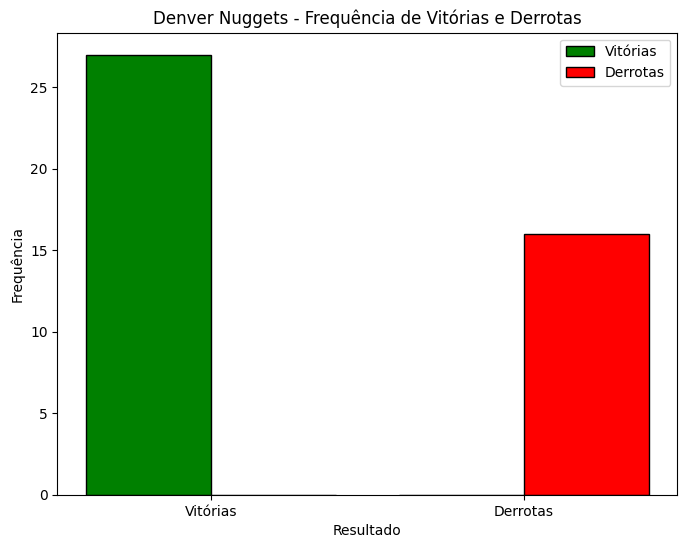

In [6]:
file_path = f"{RESULTADOS_PATH}/rf3_data_set.csv"
data = pd.read_csv(file_path)

victories = data[data['WL'] == 'W']
losses = data[data['WL'] == 'L']

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(
    [victories['WL'], losses['WL']], 
    bins=2, 
    color=['green', 'red'], 
    edgecolor='black', 
    label=['Vitórias', 'Derrotas'], 
    rwidth=0.8, 
    align='mid'
)

ax.set_title('Denver Nuggets - Frequência de Vitórias e Derrotas')
ax.set_xlabel('Resultado')
ax.set_ylabel('Frequência')
ax.set_xticks([0.25, 0.75])
ax.set_xticklabels(['Vitórias', 'Derrotas'])
ax.legend()

output_path = f"{RESULTADOS_PATH}/graficos"
os.makedirs(output_path, exist_ok=True)
output_file = f"{output_path}/denver_frequencia_vitorias_derrotas_histograma.png"
plt.savefig(output_file, format='png', dpi=300)

plt.show()

### Gráfico de Setor [Pizza] para o percentual de para Vitórias em casa, Vitórias fora de casa, Derrotas em casa e Derrotas fora de casa.

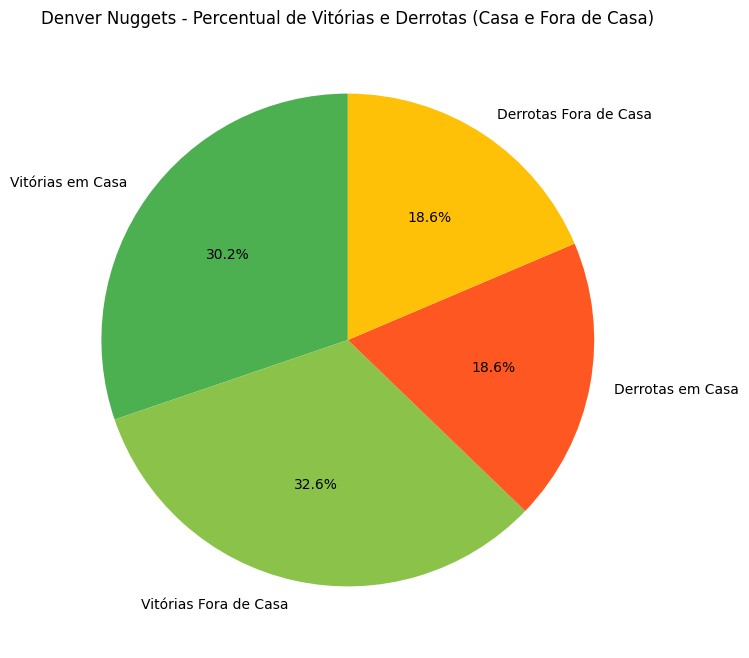

In [7]:
file_path = f"{RESULTADOS_PATH}/rf3_total_vitorias_derrotas_denver.csv"
data = pd.read_csv(file_path)

labels = [
    "Vitórias em Casa",
    "Vitórias Fora de Casa",
    "Derrotas em Casa",
    "Derrotas Fora de Casa"
]
values = [
    data.loc[0, "Total de vitórias em casa"],
    data.loc[0, "Total de vitórias fora de casa"],
    data.loc[0, "Total de derrotas em casa"],
    data.loc[0, "Total de derrotas fora de casa"]
]

fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(
    values, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=["#4CAF50", "#8BC34A", "#FF5722", "#FFC107"]
)

ax.set_title("Denver Nuggets - Percentual de Vitórias e Derrotas (Casa e Fora de Casa)")

output_path = f"{RESULTADOS_PATH}/graficos"
os.makedirs(output_path, exist_ok=True)
output_file = f"{output_path}/denver_percentual_vitorias_derrotas_pizza.png"
plt.savefig(output_file, format='png', dpi=300)

plt.show()

### Gráfico de Radar exibindo a média de pontos marcados e sofridos nos jogos em casa e fora de casa.

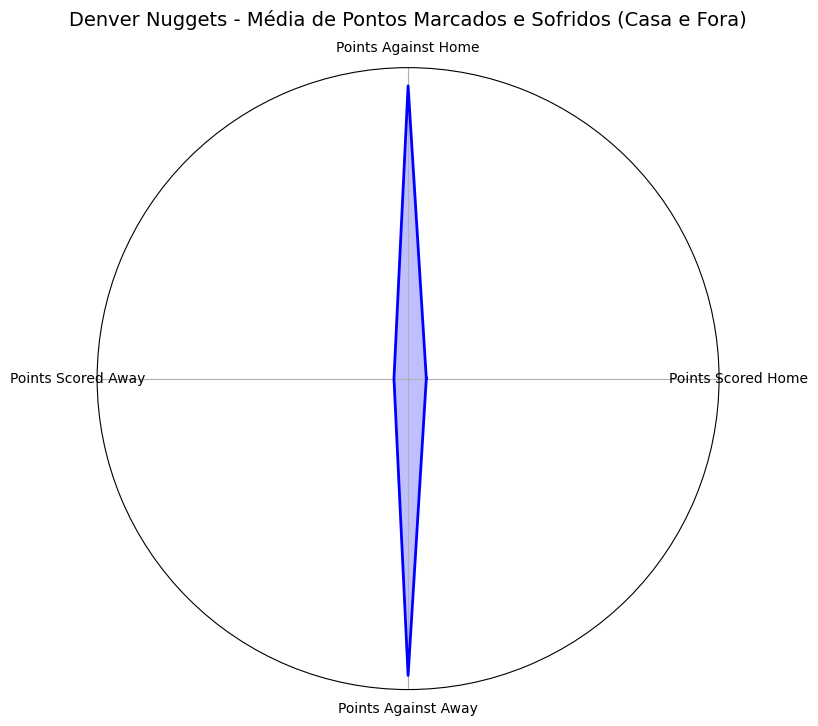

In [8]:
data = pd.read_csv(f"{RESULTADOS_PATH}/rf3_data_set.csv")

data['Home/Away'] = data['MATCHUP'].apply(lambda x: 'Home' if 'vs.' in x else 'Away')

data['Points_Against'] = data['PTS'].max() * 2 - data['PTS']

averages = data.groupby('Home/Away').agg({
    'PTS': 'mean', 
    'Points_Against': 'mean' 
}).rename(columns={'PTS': 'Points Scored'}) 

categories = ['Points Scored Home', 'Points Against Home', 'Points Scored Away', 'Points Against Away']
values = [
    averages.loc['Home', 'Points Scored'],
    averages.loc['Home', 'Points_Against'], 
    averages.loc['Away', 'Points Scored'],
    averages.loc['Away', 'Points_Against']  
]

values += values[:1]

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

ax.set_title('Denver Nuggets - Média de Pontos Marcados e Sofridos (Casa e Fora)', fontsize=14, pad=30)

ax.set_rlabel_position(30) 
plt.subplots_adjust(top=0.85) 

plt.tight_layout()
output_path = f"{RESULTADOS_PATH}/graficos"
os.makedirs(output_path, exist_ok=True)
output_file = f"{output_path}/denver_media_pontos_marcados__casa_fora.png"
plt.savefig(output_file, format='png', dpi=300)
plt.show()

### Gráfico de Linhas exibindo a sequência de vitórias e derrotas ao longo da temporada.

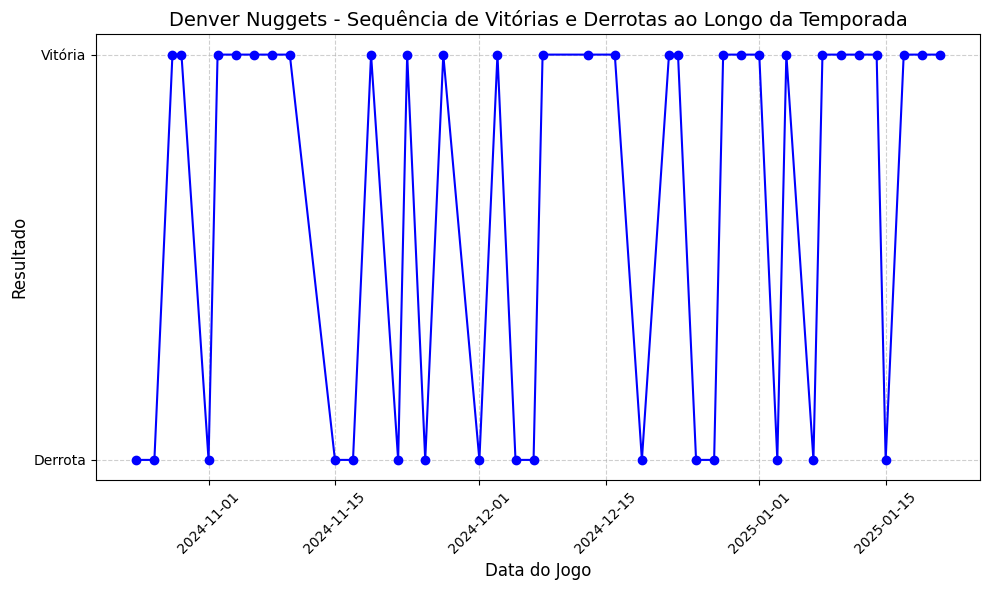

In [9]:
file_path = f"{RESULTADOS_PATH}/rf3_data_set.csv"
data = pd.read_csv(file_path)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'], format='%b %d, %Y')

data = data.sort_values('GAME_DATE')

data['Result'] = data['WL'].map({'W': 1, 'L': -1})

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(data['GAME_DATE'], data['Result'], marker='o', linestyle='-', label='Resultado do Jogo', color='blue')

ax.set_title('Denver Nuggets - Sequência de Vitórias e Derrotas ao Longo da Temporada', fontsize=14)
ax.set_xlabel('Data do Jogo', fontsize=12)
ax.set_ylabel('Resultado', fontsize=12)
ax.set_yticks([-1, 1])
ax.set_yticklabels(['Derrota', 'Vitória'])
ax.grid(True, linestyle='--', alpha=0.6)

output_path = f"{RESULTADOS_PATH}/graficos"
os.makedirs(output_path, exist_ok=True)
output_file = f"{output_path}/denver_sequencia_vitorias_derrotas_tempo.png"
plt.savefig(output_file, format='png', dpi=300)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Gráfico de Dispersão exibindo equipes e a média de pontos marcados e sofridos durante a temporada

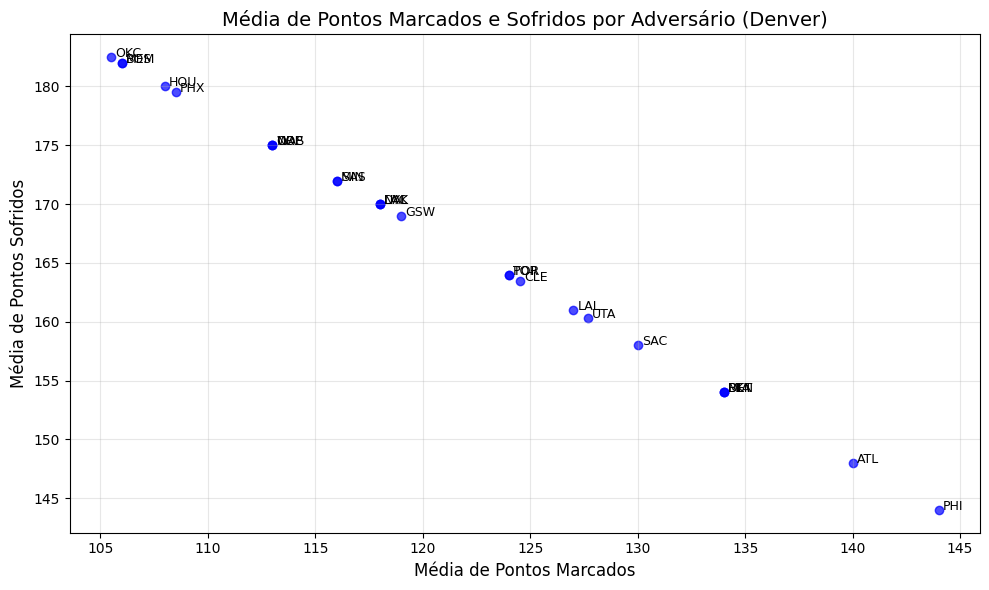

In [11]:
data = pd.read_csv(f"{RESULTADOS_PATH}/rf3_data_set.csv")

data['Opponent'] = data['MATCHUP'].apply(lambda x: x.split(' ')[-1])

data['Points_Against'] = data['PTS'].max() * 2 - data['PTS']

averages_by_team = data.groupby('Opponent').agg({
    'PTS': 'mean',    
    'Points_Against': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(averages_by_team['PTS'], averages_by_team['Points_Against'], color='blue', alpha=0.7)

for i, row in averages_by_team.iterrows():
    plt.text(row['PTS'] + 0.2, row['Points_Against'], row['Opponent'], fontsize=9)

plt.title('Média de Pontos Marcados e Sofridos por Adversário (Denver)', fontsize=14)
plt.xlabel('Média de Pontos Marcados', fontsize=12)
plt.ylabel('Média de Pontos Sofridos', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()


output_path = f"{RESULTADOS_PATH}/graficos"
os.makedirs(output_path, exist_ok=True)
output_file = f"{output_path}/denver_dispersao_equipes_média_pontos_marcados_sofridos.png"
plt.savefig(output_file, format='png', dpi=300)

plt.show()

### Apresente um gráfico da sua escolha para exibir os dados referentes a Tabela 5 do RF6 e a Tabela 6 do RF7.

#### Gráfico de Pizza referentes a Tabela 5, RF6 - Temporada Atual

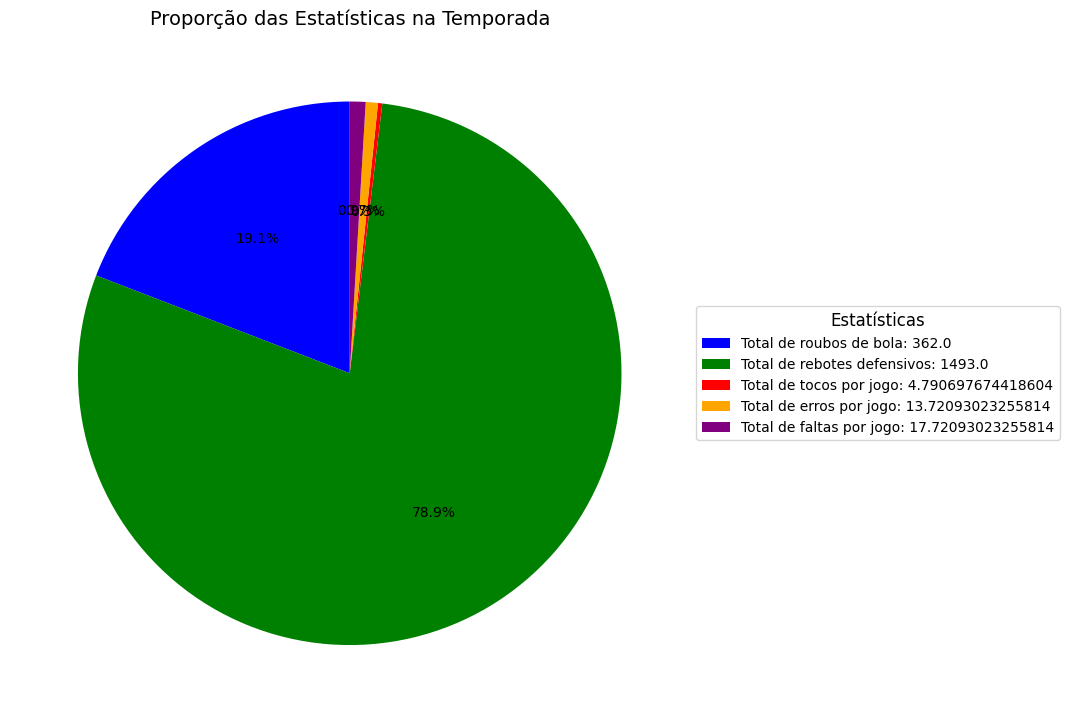

In [12]:
data = pd.read_csv(f"{RESULTADOS_PATH}/rf6_estatisticas_temporada_atual.csv")

labels = data.columns
values = data.iloc[0]
colors = ['blue', 'green', 'red', 'orange', 'purple']

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    values, labels=None, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 10}
)

ax.legend(
    wedges,
    [f"{label}: {value}" for label, value in zip(labels, values)],
    title="Estatísticas",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title_fontsize=12
)

plt.title('Proporção das Estatísticas na Temporada', fontsize=14)
plt.tight_layout()

output_path = f"{RESULTADOS_PATH}/graficos"
os.makedirs(output_path, exist_ok=True)
output_file = f"{output_path}/denver_pizza_rf6_temporada_atual.png"
plt.savefig(output_file, format='png', dpi=300)

plt.show()

#### Gráfico de Pizza referentes a Tabela 5, RF6 - Temporada Passada

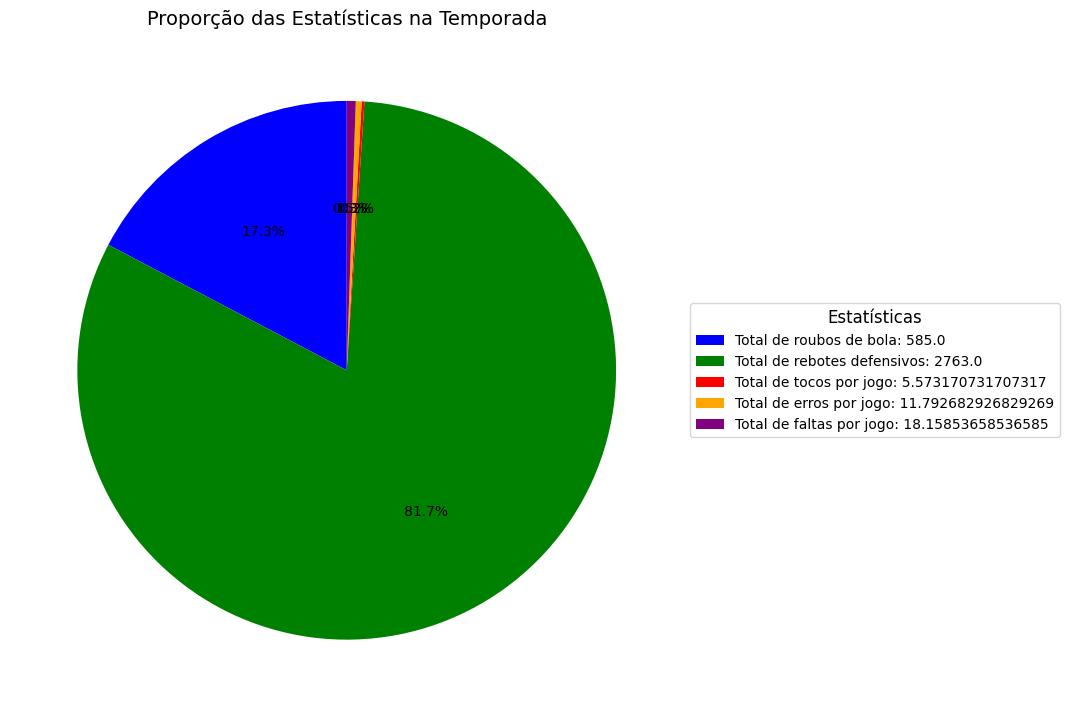

In [13]:
data = pd.read_csv(f"{RESULTADOS_PATH}/rf6_estatisticas_temporada_passada.csv")

labels = data.columns
values = data.iloc[0]
colors = ['blue', 'green', 'red', 'orange', 'purple']

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    values, labels=None, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 10}
)

ax.legend(
    wedges,
    [f"{label}: {value}" for label, value in zip(labels, values)],
    title="Estatísticas",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title_fontsize=12
)

plt.title('Proporção das Estatísticas na Temporada', fontsize=14)
plt.tight_layout()

output_path = f"{RESULTADOS_PATH}/graficos"
os.makedirs(output_path, exist_ok=True)
output_file = f"{output_path}/denver_pizza_rf6_temporada_passada.png"
plt.savefig(output_file, format='png', dpi=300)

plt.show()

#### Gráfico de Pizza referentes a Tabela 6, RF7 - Temporada atual

   Data do jogo Adversário Vitória ou derrota Casa ou fora     Placar
0  APR 14, 2024        MEM            Vitória         Fora  111 - 126
1  APR 12, 2024        SAS            Derrota         Fora  121 - 120
2  APR 10, 2024        MIN            Vitória         Casa  116 - 107
3  APR 09, 2024        UTA            Vitória         Fora   95 - 111
4  APR 06, 2024        ATL            Vitória         Casa  142 - 110


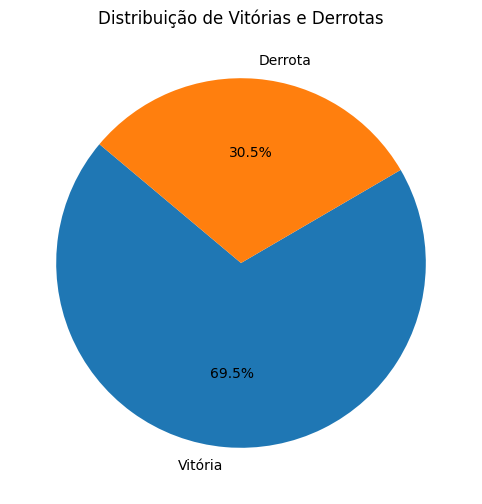

In [ ]:
file_path = f"{RESULTADOS_PATH}/rf7_estatisticas_temporada_atual.csv"
data = pd.read_csv(file_path)

print(data.head())

summary = data['Vitória ou derrota'].value_counts()

plt.figure(figsize=(8, 6))
summary.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Vitórias e Derrotas')
plt.ylabel('')

output_path = f"{RESULTADOS_PATH}/graficos"
os.makedirs(output_path, exist_ok=True)
output_file = f"{output_path}/denver_pizza_rf7_temporada_atual.png"
plt.savefig(output_file, format='png', dpi=300)

plt.show()

#### Gráfico de Pizza referentes a Tabela 6, RF7 - Temporada Passada

   Data do jogo Adversário Vitória ou derrota Casa ou fora     Placar
0  APR 14, 2024        MEM            Vitória         Fora  111 - 126
1  APR 12, 2024        SAS            Derrota         Fora  121 - 120
2  APR 10, 2024        MIN            Vitória         Casa  116 - 107
3  APR 09, 2024        UTA            Vitória         Fora   95 - 111
4  APR 06, 2024        ATL            Vitória         Casa  142 - 110


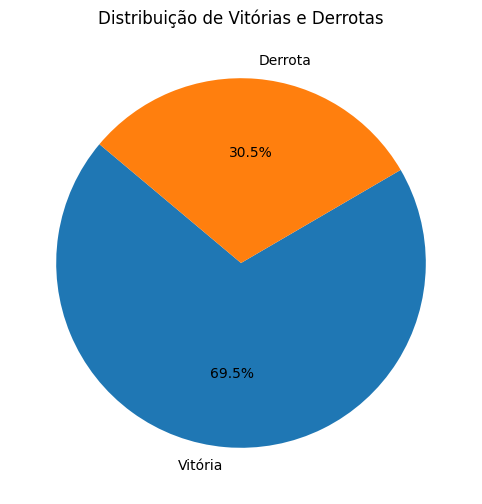

In [17]:
file_path = f"{RESULTADOS_PATH}/rf7_estatisticas_temporada_passada.csv"
data = pd.read_csv(file_path)

print(data.head())

summary = data['Vitória ou derrota'].value_counts()

plt.figure(figsize=(8, 6))
summary.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Vitórias e Derrotas')
plt.ylabel('') 

output_path = f"{RESULTADOS_PATH}/graficos"
os.makedirs(output_path, exist_ok=True)
output_file = f"{output_path}/denver_pizza_rf7_temporada_passada.png"
plt.savefig(output_file, format='png', dpi=300)

plt.show()